In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import tensorflow as tf
from tensorflow import keras

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from IPython.display import SVG
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [3]:
import livelossplot
from tensorflow.keras.utils import plot_model
from livelossplot import PlotLossesKeras

## Importing datasets

In [2]:
#dataset 01

In [4]:
x_train = pd.read_csv('../Dataset/Logistic_X_Train.csv')
x_test = pd.read_csv('../Dataset/Logistic_X_Test.csv')
y_train = pd.read_csv('../Dataset/Logistic_Y_Train.csv')
label = pd.read_csv('../Dataset/SampleOutput.csv')

In [8]:
x_train.head()


,f1,f2
0,0.574727,0.787277
1,0.251502,0.908940
2,1.860578,0.013763
3,0.019477,1.047210
4,0.029794,0.252236


In [102]:
x_test.count()

f1    750
f2    750
dtype: int64

In [103]:
label.count()

label    2250
dtype: int64

In [104]:
y_train.count()

label    2250
dtype: int64

In [105]:
x_train.count()

f1    2250
f2    2250
dtype: int64

In [9]:
x_test.head()

,f1,f2
0,-0.799827,-0.003833
1,-0.757785,1.031370
2,1.036808,-0.357004
3,0.569531,1.083775
4,0.954205,-0.598412


In [13]:
y_train.head()

,label
0,0
1,0
2,1
3,0
4,1


In [98]:
label.describe()

,label
count,2250.000000
mean,0.498222
std,0.500108
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [99]:
x_test.describe()

,f1,f2
count,750.000000,750.000000
mean,0.476753,0.233118
std,0.887725,0.529138
min,-1.493415,-1.078011
25%,-0.154408,-0.192783
50%,0.430467,0.222561
75%,1.112019,0.650408
max,2.525033,1.543534


In [15]:
y_train.describe()

,label
count,2250.000000
mean,0.498222
std,0.500108
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [88]:
x_train.corr()

,f1,f2
f1,1.000000,-0.397005
f2,-0.397005,1.000000


---

# Visualizations

Let's visualize our data a bit.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F75AA24A58>,
      dtype=object)

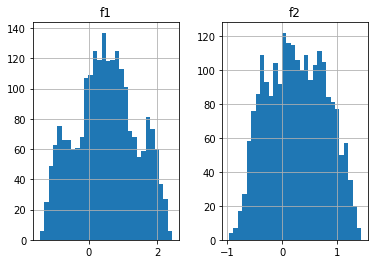

In [21]:
x_train.hist(bins = 30,)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F75BF08A58>]],
      dtype=object)

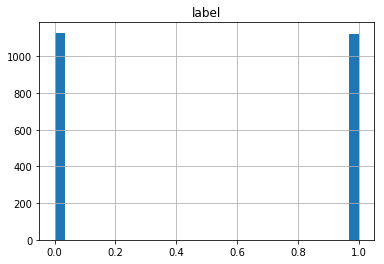

In [22]:
y_train.hist(bins=30)

In [30]:
sns.set()

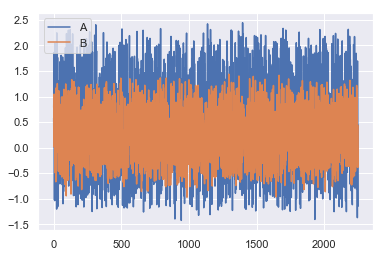

In [35]:
plt.plot(x_train)
plt.legend('ABCDEF', ncol=1, loc='upper left')

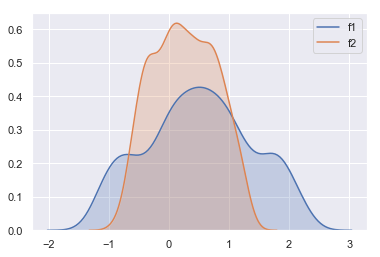

In [36]:
for col in ['f1','f2']:
    sns.kdeplot(x_train[col], shade= True)

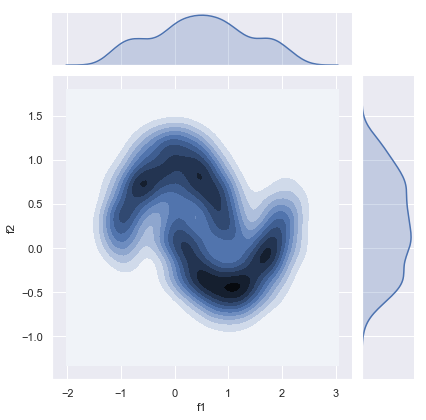

In [40]:
sns.jointplot("f1","f2", x_train, kind='kde')

-----------------------------------------------------------

# Modeling

Let's start with the architecture, and try making NN model with best results.

In [53]:
ncols = x_train.columns.shape
ncols

(2,)

In [65]:
def modelv0():
    model = Sequential([
        Dense(3, kernel_initializer='normal', activation='relu', input_dim=len(x_train.keys())),
        Dense(1)
    ])
    model.compile(optimizer='Adadelta',
              loss='mse',
              metrics=['accuracy', 'mse'])
    return model

In [31]:
#model v1
def modelv1():
    model = Sequential([
        Dense(5, kernel_initializer='normal', activation='relu', input_dim=len(x_train.keys())),
        Dense(25, kernel_initializer='normal', activation='relu'),     
        Dense(50, kernel_initializer='normal', activation='relu'),         
        Dense(50, kernel_initializer='normal', activation='relu'),         
        Dense(50, kernel_initializer='normal', activation='relu'),         
        Dense(25, kernel_initializer='normal', activation='relu'),    
        Dense(1)
    ])
    model.compile(loss='mse',
                 optimizer='adam',
                 metrics=['accuracy','mae', 'mse'])
    return model

### Let's see our model

In [66]:
v0 = modelv0()

In [67]:
v0.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 3)                 9         
_________________________________________________________________
dense_64 (Dense)             (None, 1)                 4         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


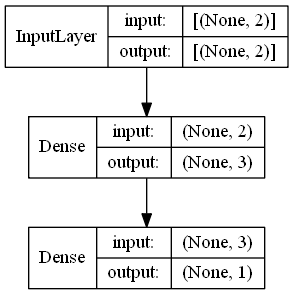

In [86]:
plot_model(v0,show_shapes=True, show_layer_names=False)

In [76]:
v1 = modelv1()

In [77]:
v1.summary() 

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_65 (Dense)             (None, 5)                 15        
_________________________________________________________________
dense_66 (Dense)             (None, 25)                150       
_________________________________________________________________
dense_67 (Dense)             (None, 50)                1300      
_________________________________________________________________
dense_68 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_69 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_70 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_71 (Dense)             (None, 1)               

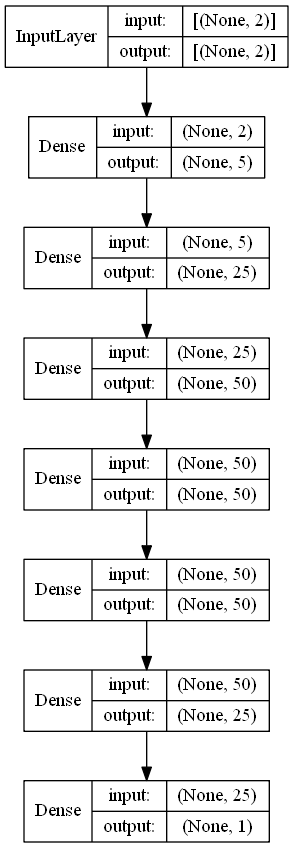

In [87]:
plot_model(v1,show_shapes=True, show_layer_names=False)

----

# Let's Train!

After building our model, let's move now onto training our data n then make some results.

In [95]:
# we will be having a callback for earlystopping, so that model stop training when it can't improve anymore

In [15]:
early_stopping_monitor = EarlyStopping(monitor= 'acc', patience=5)

In [73]:
# 1200 epochs
history0 = v0.fit(
    x_train,
    y_train,
    verbose=0,
    epochs = 1200,
    validation_split=0.2
)

In [75]:
hist0 = pd.DataFrame(history0.history)
hist0.tail()

,loss,acc,mean_squared_error,val_loss,val_acc,val_mean_squared_error
495,0.111721,0.832222,0.111721,0.108127,0.848889,0.108127
496,0.111697,0.832222,0.111697,0.108097,0.848889,0.108097
497,0.111672,0.832222,0.111672,0.108067,0.848889,0.108067
498,0.111647,0.832222,0.111647,0.108037,0.848889,0.108037
499,0.111623,0.832222,0.111623,0.108006,0.848889,0.108006


In [78]:
# 200 epochs, batchsize 2
history1  = v1.fit(
    x_train,
    y_train,
    epochs=200,
    batch_size=2,
    validation_split=0.1,
    verbose=0
)

In [79]:
hist1 = pd.DataFrame(history1.history)
hist1.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error
195,0.027146,0.061444,0.027146,0.022819,0.057624,0.022819
196,0.026646,0.062777,0.026646,0.023942,0.064949,0.023942
197,0.026511,0.059900,0.026511,0.024218,0.071650,0.024218
198,0.025910,0.059231,0.025910,0.022267,0.052012,0.022267
199,0.027578,0.060641,0.027578,0.023933,0.054951,0.023933


Loss is low as 2%.

---

let's evaluate our model

## Modelv0

In [81]:
score0 = v0.evaluate(x_train, y_train, batch_size=128)
print('Test loss:', score0[0])
print('Test accuracy:', score0[1])

2250/2250 [==============================] - 0s 6us/sample - loss: 0.1109 - acc: 0.8356 - mean_squared_error: 0.1109
Test loss: 0.11088892565833197
Test accuracy: 0.83555555


## Modelv1

In [83]:
score1 = v1.evaluate(x_train, y_train, batch_size=128)
print('Test loss:', score1[0])

2250/2250 [==============================] - 0s 8us/sample - loss: 0.0280 - mean_absolute_error: 0.0589 - mean_squared_error: 0.0280
Test loss: 0.028001832637521956
